In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('data.csv')

# Data Exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData summary:")
print(df.describe())

Dataset shape: (8436, 16)

First 5 rows:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxur

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              64
Engine Cylinders       10
Transmission Type       0
Driven_Wheels           1
Number of Doors         7
Market Category      2519
Vehicle Size            1
Vehicle Style           1
highway MPG             1
city mpg                1
Popularity              1
MSRP                    1
dtype: int64


In [ ]:
# Handle missing data in numerical features
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders',
                     'highway MPG', 'city mpg', 'Popularity',
                     'Number of Doors', 'MSRP']
df_clean = df[numerical_features].dropna()

# Detect and remove outliers using IQR
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

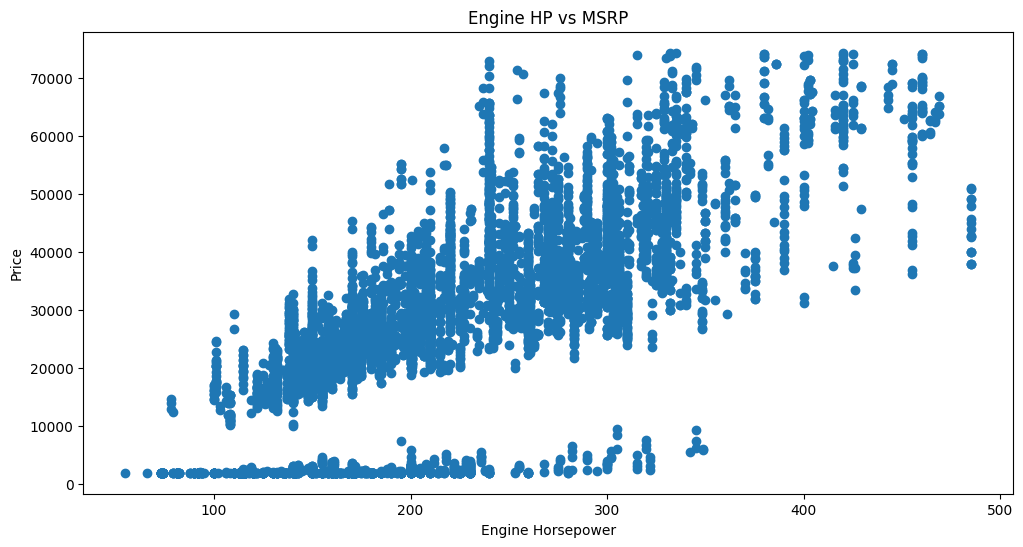

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['Engine HP'], df_clean['MSRP'])
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price')
plt.show()

In [ ]:
# Prepare data for modeling
X = df_clean[['Year', 'Engine HP', 'Engine Cylinders',
             'highway MPG', 'city mpg', 'Popularity',
             'Number of Doors']]
y = df_clean['MSRP']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display model parameters
print("\nModel Parameters:")
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Model Parameters:
Intercept: 28581.83
Coefficients:
Year: 7714.19
Engine HP: 9642.41
Engine Cylinders: -963.44
highway MPG: -1004.47
city mpg: 600.20
Popularity: -437.26
Number of Doors: 161.06


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 63351737.86
Mean Absolute Error: 6134.22
R-squared: 0.76


In [ ]:
# Cross-validation (using 5-fold cross-validation)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-Validation Mean Squared Error: {-cv_scores.mean():.2f}")


Cross-Validation Mean Squared Error: 76654836.25


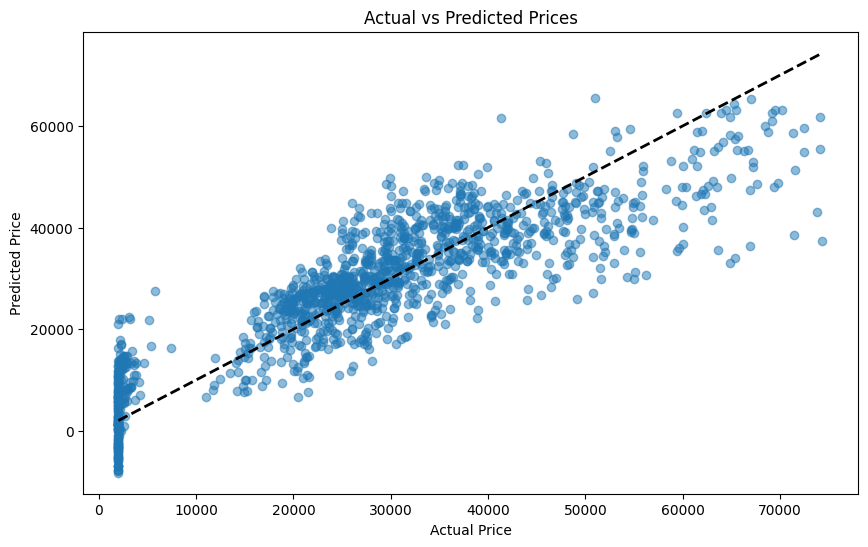

In [ ]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()